Here we roughly reproduce the results of the paper
[Simulating the Sycamore quantum supremacy circuits - Pan & Zhang](https://scirate.com/arxiv/2103.03074). 
There are of course many practical aspects of actually performing the contraction that we ignore here,
instead just investigating the contraction complexity of the core task of computing a single marginal
probability distribution of 21 qubits (enough to generate a slice of >2 million correlated amplitudes).

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import cotengra as ctg

Load the circuit:

In [2]:
circ = qtn.Circuit.from_qasm_file('circuit_n53_m20_s0_e0_pABCDCDAB.qsim')

Instantiate a path optimizer:

In [3]:
opt = ctg.HyperOptimizer(
    methods=["mycmn"],
    slicing_reconf_opts={'target_size': 2**30},  # dynamically slice to W=30
    max_repeats=1,  # sample 1000 contraction trees
    parallel=False, progbar=True,
)

Rehearse contracting a 21 qubit marginal ([see quimb](https://quimb.readthedocs.io/en/latest/tensor-circuit.html#Generate-samples-from-a-chaotic-circuit)
for what this is doing, the functional difference is we would take *all* the high probability
strings from this marginal rather than a single one):

In [4]:
rehs = circ.sample_chaotic_rehearse(circ.calc_qubit_ordering()[-21:], optimize=opt)

  0%|          | 0/1 [00:00<?, ?it/s]

0.0013071274770585187, 391
['l']
0.0013071274770585187, 390
['w']
0.0013071274770585187, 389
['x']
0.0013071274770585187, 388
['F']
0.0013053544305568281, 387
['b']
0.0013053544305568281, 386
['d']
0.0013053544305568281, 385
['h']
0.0013053544305568281, 384
['p']
0.0013053544305568281, 383
['B']
0.0013053544305568281, 382
['õ']
0.0013053544305568281, 381
['͕']
0.0013035813840551376, 380
['I']
0.001301808337553447, 379
['O']
0.001301808337553447, 378
['Z']
0.001301808337553447, 377
['È']
0.001301808337553447, 376
['Ô']
0.001301808337553447, 375
['û']
0.001301808337553447, 374
['ģ']
0.001301808337553447, 373
['͐']
0.001301808337553447, 372
['ͭ']
0.001301808337553447, 371
['͵']
0.0012982622445500659, 370
['t']
0.0012982622445500659, 369
['á']
0.0012982622445500659, 368
['é']
0.0012947161515466847, 367
['Ä']
0.0012947161515466847, 366
['Ë']
0.0012947161515466847, 365
['Ï']
0.0012947161515466847, 364
['×']
0.0012947161515466847, 363
['Ú']
0.0012947161515466847, 362
['Ý']
0.00129471615154668

log2[SIZE]: 30.00 log10[FLOPs]: 23.39: 100%|██████████| 1/1 [02:19<00:00, 139.10s/it]


Retrieve the (dynamically sliced) contraction tree:

In [5]:
tree = opt.get_tree()

Check the contraction cost / time complexity (n.b. this is half what's displayed
above as in units not specific to real dtypes):

In [6]:
f'{tree.contraction_cost():e}'

'1.229301e+23'

In the paper the total time complexity is reported as $4.51 \times 10^{18}$, so, 
practical efficiency considerations aside (which are not trivial!) this is 
very similar.

In [7]:
len(tree.sliced_inds)

39

We can also look at the optimizer progression:

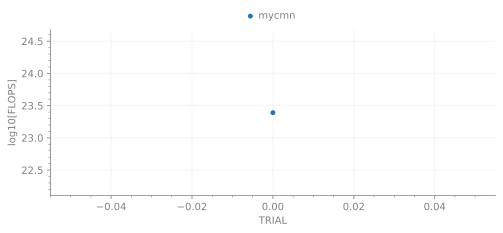

(<Figure size 800x300 with 1 Axes>,
 <Axes: xlabel='TRIAL', ylabel='log10[FLOPS]'>)

In [8]:
opt.plot_trials('flops')

And visualize the actual contraction tree:

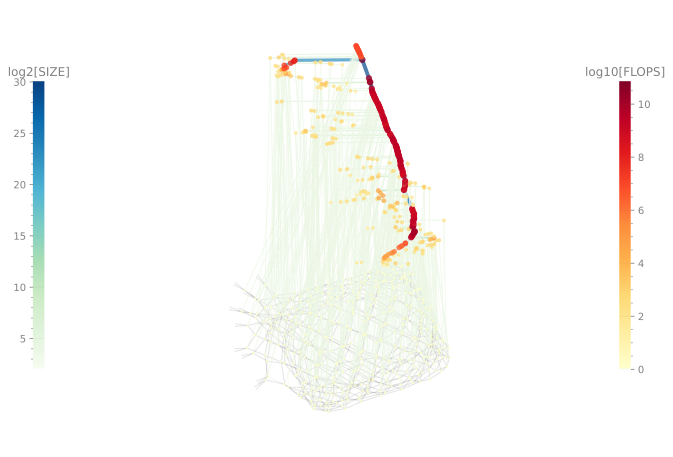

(<Figure size 800x800 with 3 Axes>, <Axes: >)

In [9]:
tree.plot_tent(order=True, figsize=(8, 8))